In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [115]:
veri = {'x' : [1,2,1,3,4,3],
        'y' : [1,1,2,3,3,4],
        'label' : ['A','A','A','B','B','B']}
df = pd.DataFrame(veri)
df

,x,y,label
0,1,1,A
1,2,1,A
2,1,2,A
3,3,3,B
4,4,3,B
5,3,4,B


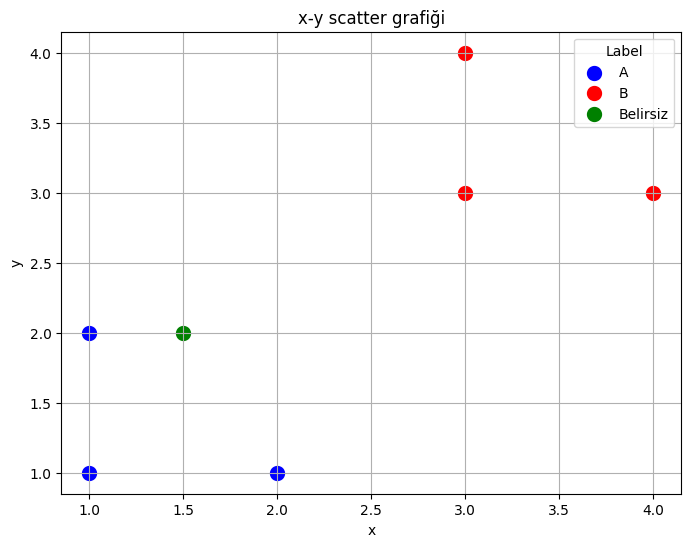

In [116]:
# Scatter grafiği çizme:
def grafikData():
    colors = {'A' : 'blue',
              'B' : 'red'}
    plt.figure(figsize=(8,6))
    for label in df['label'].unique():
        subset = df[df['label'] == label]
        grafik = plt.scatter(subset['x'], subset['y'], c=colors[label], label=label, linewidths=5)

def grafik():
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('x-y scatter grafiği')
    plt.legend(title='Label')
    plt.grid(True)


grafikData()
# x = 1.5 , y = 2 için label ne olmalıdır?
tahmin_x_y = [1.5, 2]
plt.scatter(tahmin_x_y[0], tahmin_x_y[1], c='green', label='Belirsiz', linewidths=5)
grafik()



In [117]:
# EUCLIDEAN MESAFE ALGORİTMASI: ((x-x1)**2 + (y-y1)**2)^(0.5) --> hipotenüs
# 1.Nokta ile arasındaki fark: (1,1)-->(1.5,2)
nokta1Fark = ((tahmin_x_y[0] - df['x'][0])**2 + (tahmin_x_y[1] - df['y'][1])**2)**(0.5)
nokta1Fark

# (1.5 , 2) noktasının tüm noktalara olan mesafeleri:
mesafe = {}
for i in range(1, len(df.index)+1):
    mesafe[i] = ((tahmin_x_y[0] - df['x'][i-1])**2 + (tahmin_x_y[1] - df['y'][i-1])**2)**(0.5)
mesafe

"""
Burada mesafe sözlüğünün içindeki tüm veriler yeni noktanın diğer tüm noktalara olan EUCLIDEAN uzaklığını gösterir.
KNN algoritması için K=3 olsaydı. Mesafesi en küçük olan 3 verinin en az 2 tanesinin etiket değerine atanır.

Burada K=2 için mesafeler eşit olursa karar verilemez dolayısıyla K değerlerini çift seçmek önerilmez. Genellikle tek sayı seçilmelidir.
"""

{1: 1.118033988749895,
 2: 1.118033988749895,
 3: 0.5,
 4: 1.8027756377319946,
 5: 2.692582403567252,
 6: 2.5}